# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

### Pacotes Utilizados:

In [ ]:
%pip install pyEDFlib
%pip install mne

In [3]:
#Definindo padrões de plot
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [ ]:
import database.databaseutils as db
import reader.edfreader as edfreader
import model.summarymodelconverter as converter

db.connect()

st = db.summary_by_name('chb01_18.edf')
summary_model = converter.model_from_tuple(st)

edf_raw_object = edfreader.raw_data(summary_model)

Using matplotlib as 2D backend.


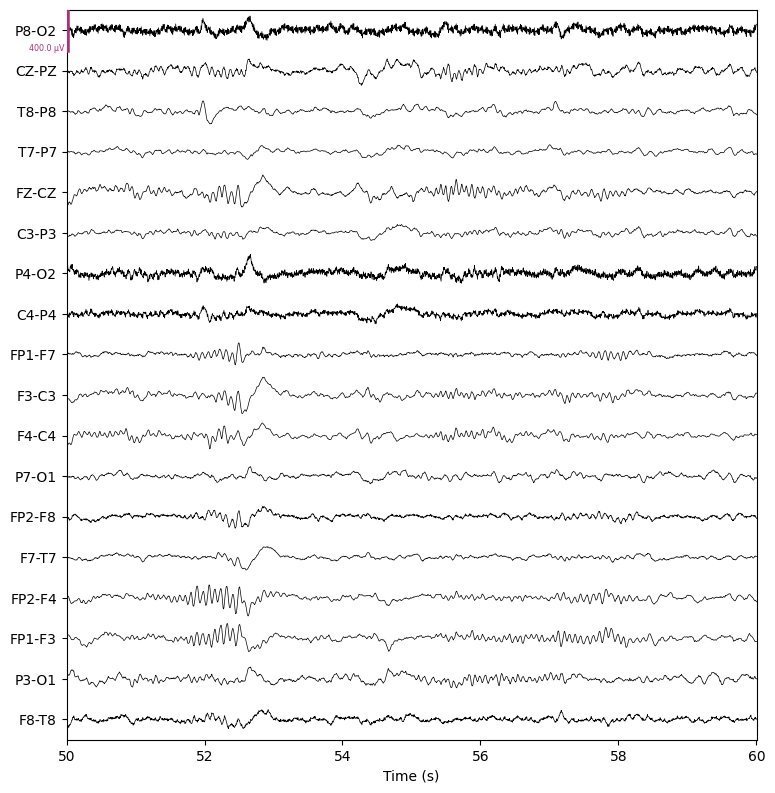

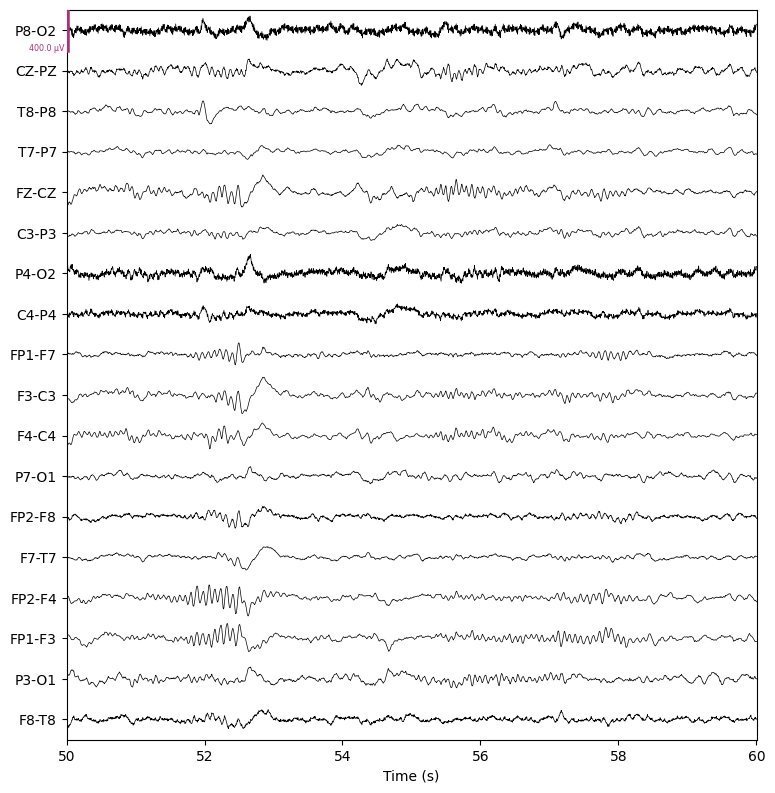

In [4]:
edf_raw_object.plot(start = 50, **plot_kwargs)

In [5]:
import re
import matplotlib.pyplot as plt

replace_dict = {}
drop_list = []
for channel_name in edf_raw_object.info['ch_names']:
    name_change = re.findall('\w+',channel_name)[0].title()
    if name_change in list(replace_dict.values()):
        drop_list.append(channel_name)
    else:
        replace_dict[channel_name] = name_change

edf_raw_object.drop_channels(drop_list)
edf_raw_object.rename_channels(replace_dict)
edf_raw_object.set_montage('standard_1020')

<RawArray | 16 x 921600 (3600.0 s), ~112.5 MB, data loaded>